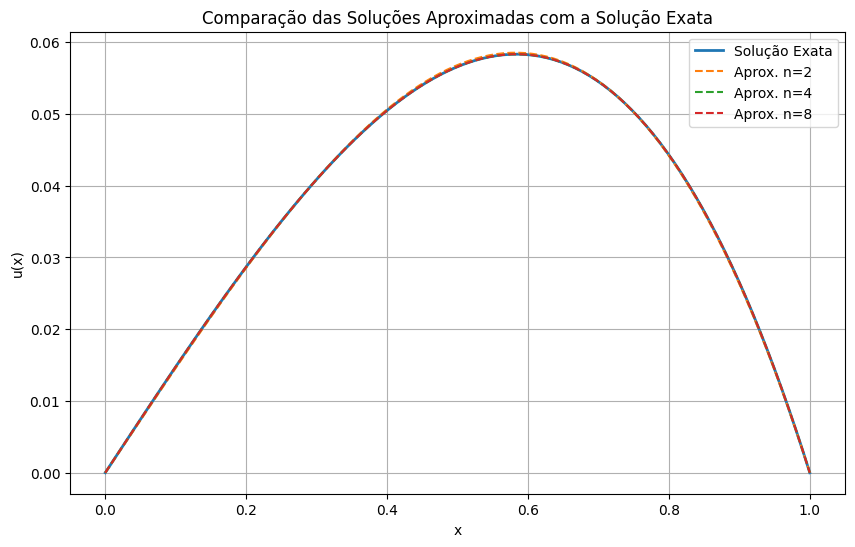

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Funções para calcular os coeficientes da matriz A e vetor f
def a_ij(i, j):
    return (i * j / (i + j - 1) - ((1 + i) * j + (1 + j) * i) / (i + j) + (1 + (1 + i) * (1 + j)) / (i + j + 1) - 2 / (i + j + 2) + 1 / (i + j + 3))

def f_i(i):
    return 1 / (i + 3) - 1 / (i + 2)


def construir_A_f(n):
    A = np.zeros((n, n))
    f = np.zeros(n)
    for i in range(1, n+1):
        f[i-1] = f_i(i)
        for j in range(1, n+1):
            A[i-1, j-1] = a_ij(i, j)
    return A, f

def resolver_sistema(A, f):
    w = np.linalg.solve(A, f)
    return w

def u_h(x, w):
    n = len(w)
    u = np.zeros_like(x)
    for i in range(1, n+1):
        u += w[i-1] * x**i * (x - 1)
    return u

n_val = [2, 4, 8]
x = np.linspace(0, 1, 100)
u_exact = x - np.sinh(x) / np.sinh(1)

s_a = {}
for n in n_val:
    A, f = construir_A_f(n)
    w = resolver_sistema(A, f)
    u_ap = u_h(x, w)
    s_a[n] = u_ap

plt.figure(figsize=(10, 6))
plt.plot(x, u_exact, label='Solução Exata', linewidth=2)
for n in n_val:
    plt.plot(x, s_a[n], label=f'Aprox. n={n}', linestyle='--')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Comparação das Soluções Aproximadas com a Solução Exata')
plt.legend()
plt.grid(True)
plt.show()
